This notebook is a basic logistic regression using bag of words and built in methods in the scikit-learn package. There seems to be a lot more time needing to be spent on understanding the exact process they used. There is a github page that contains the code they used at https://github.com/dkloz/GICF. Hopefully having the code should make it much easier to replicate their study.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import sklearn
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from sklearn.linear_model import LogisticRegression

In [2]:
sentences = pd.read_csv('~/Documents/UC Berkeley/Stat198/imdb_data.csv')
sentences.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
sentences.head()

,Review,Score
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [4]:
len(sentences)

1000

In [5]:
#nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [5]:
tokens = nltk.word_tokenize(sentences['Review'][0])
tokens

['A',
 'very',
 ',',
 'very',
 ',',
 'very',
 'slow-moving',
 ',',
 'aimless',
 'movie',
 'about',
 'a',
 'distressed',
 ',',
 'drifting',
 'young',
 'man',
 '.']

In [5]:
vectorizer = CountVectorizer(min_df=1)

In [6]:
reviews = sentences['Review']

In [7]:
reviews.head()

0    A very, very, very slow-moving, aimless movie ...
1    Not sure who was more lost - the flat characte...
2    Attempting artiness with black & white and cle...
3         Very little music or anything to speak of.  
4    The best scene in the movie was when Gerardo i...
Name: Review, dtype: object

In [8]:
X = vectorizer.fit_transform(reviews)

In [9]:
X_train = X[:500, :]
X_train.shape

(500, 3047)

In [10]:
analyze = vectorizer.build_analyzer()

In [11]:
vectorizer.get_feature_names()[:10]

['10', '12', '13', '15', '15pm', '17', '18th', '1928', '1947', '1948']

In [12]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
testdf = pd.DataFrame()

In [14]:
testdf['bow'] = [X.toarray()[i] for i in range(len(X.toarray()))]

In [15]:
testdf['score'] = sentences['Score']

In [16]:
testdf.head()

,bow,score
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1


In [17]:
y_train = testdf['score'][:500]

In [18]:
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)
testdf['score_pred_class'] = logreg.predict(X)

In [19]:
testdf.tail()

,bow,score,score_pred_class
995,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1
996,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0
997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1
998,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0
999,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0


In [20]:
testdf['score_pred_prob'] = logreg.predict_proba(X)[:,1]

In [21]:
testdf.head()

,bow,score,score_pred_class,score_pred_prob
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,7.538990e-08
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,3.435041e-06
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,4.165243e-05
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,2.797354e-05
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1,9.999878e-01


In [22]:
testdf['correct_pred'] = (testdf['score'] == testdf['score_pred_class'])
testdf['num_features'] = [sum(testdf['bow'][i]) for i in range(len(testdf))]

In [23]:
sum(testdf['bow'][999])
testdf.tail()

,bow,score,score_pred_class,score_pred_prob,correct_pred,num_features
995,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1,0.846053,False,10
996,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0.332835,True,13
997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1,0.551476,False,5
998,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0.000042,True,2
999,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0.436519,True,14


In [24]:
testdf.tail(10)
sum(testdf['correct_pred']) - 500
all(testdf['score'][:500]) == all(testdf['score_pred_class'][:500]) # all true because this is the training data

True

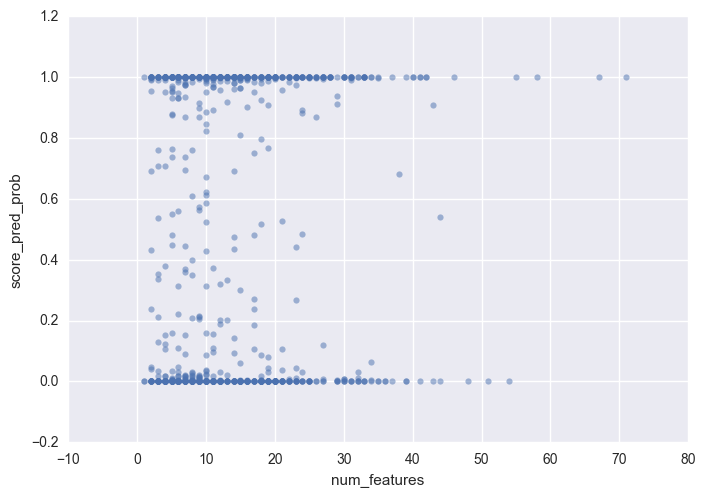

In [25]:
sns.regplot(x='num_features',y='score_pred_prob',data=testdf,fit_reg=False,scatter_kws={'alpha':0.5})

In [26]:
class_rate = (sum(testdf['correct_pred'])-500)/500
class_rate

0.73799999999999999

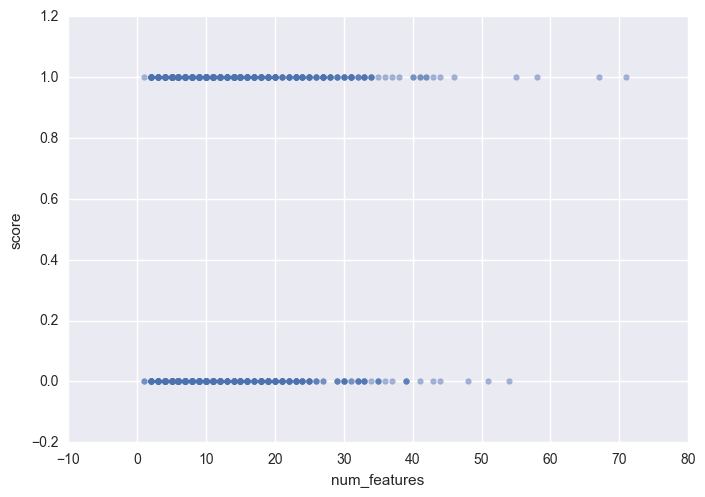

In [27]:
sns.regplot(x='num_features',y='score',data=testdf,fit_reg=False,scatter_kws={'alpha':0.5})

You can probably get a better result using the nltk library and carefully choosing what kinds of punctuation and words to get rid of. 